# 库函数导入

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# 模型训练

In [16]:
# 构造数据集
x_feature=np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label=np.array([0, 0, 0, 1, 1, 1])
# 调用模型
lr_clf = LogisticRegression()
# 拟合数据集
lr_clf=lr_clf.fit(x_feature,y_label)

# 模型参数查看

In [17]:
print('the weight of Logistic Regression:',lr_clf.coef_)#权重
print('the intercept(W0) of Logistic Regression:',lr_clf.intercept_)# 偏置

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(W0) of Logistic Regression: [-0.13139986]


# 可视化

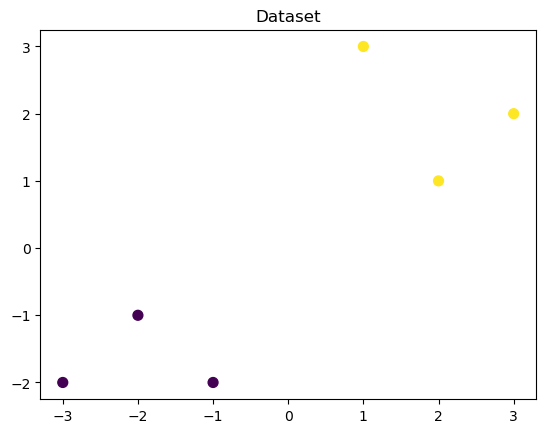

In [20]:
plt.figure() # matplotlib现在还不懂
plt.scatter(x_feature[:,0],x_feature[:,1],c=y_label,s=50,cmap='viridis')
plt.title('Dataset')
plt.show()

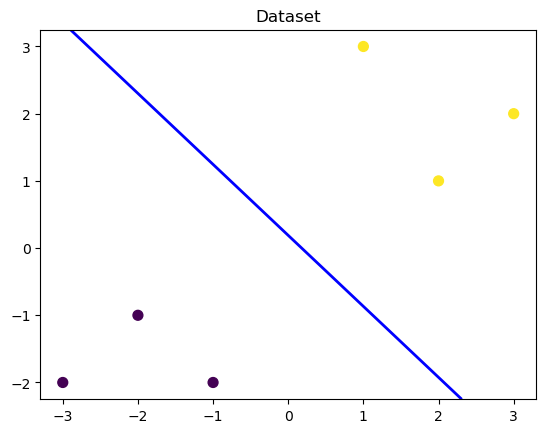

In [67]:
# 决策边界可视化
# 花了好久才弄懂这里，我日。
plt.figure()
plt.scatter(x_feature[:,0],x_feature[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))# https://blog.csdn.net/weixin_47872288/article/details/128730985

z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])# https://blog.csdn.net/anan15151529/article/details/102632463
# https://blog.csdn.net/helloword111222/article/details/121279599?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-121279599-blog-121581531.235^v38^pc_relevant_anti_t3&spm=1001.2101.3001.4242.2&utm_relevant_index=4
z_proba = z_proba[:, 1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')# 话等高线，主要是先搞懂predict_proba的定义即可

plt.show()


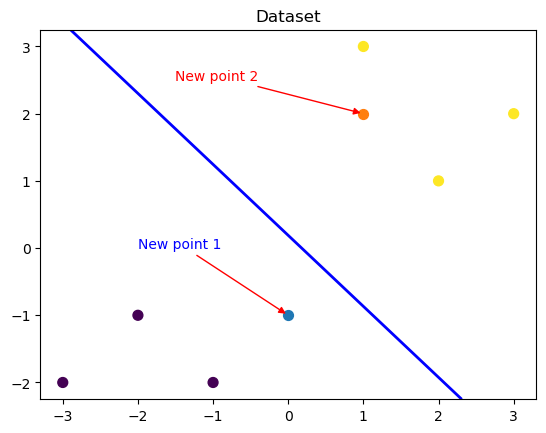

In [71]:
# 可视化新样本
plt.figure()q
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(text='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(text='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_feature[:,0],x_feature[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

# 模型预测 

In [72]:
## 在训练集和测试集上分别利用训练好的模型进行预测
y_label_new1_predict = lr_clf.predict(x_fearures_new1)
y_label_new2_predict = lr_clf.predict(x_fearures_new2)

print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所以我们可以利用 predict_proba 函数预测其概率
y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)

print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]
